<a href="https://colab.research.google.com/github/KavyaGarapati/KAVYAGARAPATI-HOMEWORK-3/blob/master/HOMEWORK_1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1






In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
 

--2019-04-17 16:02:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  75.7MB/s    in 0.9s    

2019-04-17 16:02:51 (75.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## **load the convolutional base**

In [0]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

In [0]:
conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

**concatenate convolutional base and densely connected layers**

In [0]:
from keras import layers
from keras import models
from keras import optimizers


last_layer = conv_base.get_layer('block5_pool').output

network = layers.Flatten()(last_layer)
network = layers.Dense(256, activation='relu')(network)
network = layers.Dense(1, activation='sigmoid')(network)

model = models.Model(conv_base.input, network)

#model = models.Sequential()
#model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**Training the model end to end**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6091 - acc: 0.6720 - val_loss: 0.5002 - val_acc: 0.7930
Epoch 2/100
100/100 [==============================] - 18s 183ms/step - loss: 0.5330 - acc: 0.7470 - val_loss: 0.4368 - val_acc: 0.8150
Epoch 3/100
100/100 [==============================] - 18s 182ms/step - loss: 0.4854 - acc: 0.7790 - val_loss: 0.3925 - val_acc: 0.8270
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.4423 - acc: 0.8075 - val_loss: 0.3550 - val_acc: 0.8470
Epoch 5/100
100/100 [==============================] - 18s 177ms/step - loss: 0.4337 - acc: 0.8045 - val_loss: 0.3491 - val_acc: 0.8450
Epoch 6/100
100/100 [==============================] - 18s 185ms/step - loss: 0.4197 - acc: 0.8075 - val_loss: 0.3520 - val_acc: 0.8440
Epoch 7/100
100/100 [==============================] - 19s 190ms/step - loss: 0.3949 - acc: 0.8265 -

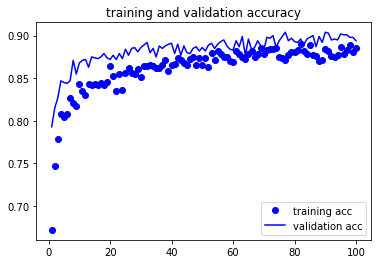

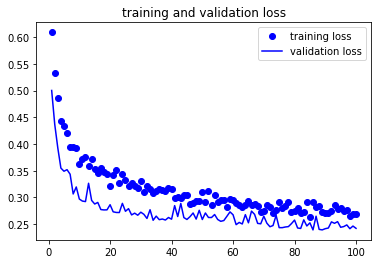

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# problem 2

**Fine Tuning**

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(
    loss='binary_crossentropy',
    
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 0.3203 - acc: 0.8630 - val_loss: 0.2310 - val_acc: 0.9060
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2630 - acc: 0.8930 - val_loss: 0.2864 - val_acc: 0.8810
Epoch 3/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2474 - acc: 0.8900 - val_loss: 0.2067 - val_acc: 0.9210
Epoch 4/100
100/100 [==============================] - 18s 184ms/step - loss: 0.2256 - acc: 0.9080 - val_loss: 0.1879 - val_acc: 0.9240
Epoch 5/100
100/100 [==============================] - 18s 185ms/step - loss: 0.2044 - acc: 0.9140 - val_loss: 0.1742 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 19s 185ms/step - loss: 0.1853 - acc: 0.9190 - val_loss: 0.1743 - val_acc: 0.9350
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1761 - acc: 0.9320 - val_loss: 0.2025 - val_acc: 0.9220
Epoch 8/100
100/100 [===========================

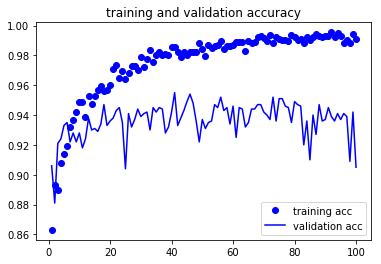

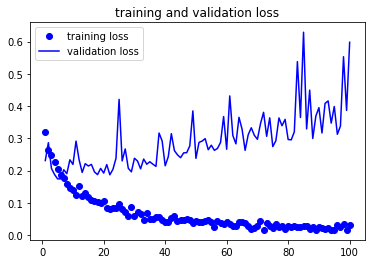

Validation loss: 0.6634685031196568
Validation accuracy: 0.8949999928474426


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)